In [1]:
import numpy as np
import keras
from keras.datasets import mnist
(xtrn, ytrn), (xtst, ytst) = mnist.load_data()

2023-06-09 17:48:47.840359: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-09 17:48:48.892628: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
assert xtrn.shape == (60000, 28, 28)
assert xtst.shape == (10000, 28, 28)
assert ytrn.shape == (60000,)
assert ytst.shape == (10000,)

_URL = "https://storage.googleapis.com/cvdf-datasets/mnist/"
_URLS = {
    "train_images": "train-images-idx3-ubyte.gz",
    "train_labels": "train-labels-idx1-ubyte.gz",
    "test_images": "t10k-images-idx3-ubyte.gz",
    "test_labels": "t10k-labels-idx1-ubyte.gz",
}

In [3]:
#printing the shapes of the vectors 
print('X_train: '  + str(xtrn.shape))
print('Y_train: '  + str(ytrn.shape))
print('X_test:  '  + str(xtst.shape))
print('Y_test:  '  + str(ytst.shape))

X_train: (60000, 28, 28)
Y_train: (60000,)
X_test:  (10000, 28, 28)
Y_test:  (10000,)


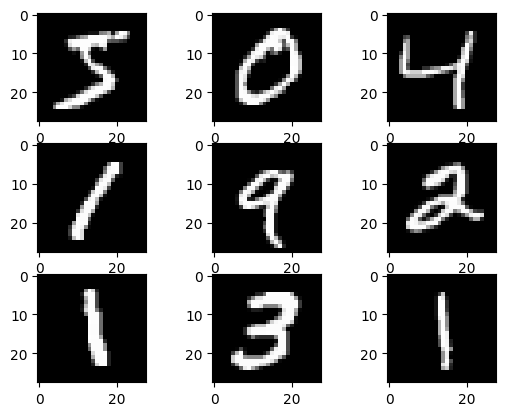

In [4]:
from matplotlib import pyplot
for i in range(9):  
    pyplot.subplot(330 + 1 + i)
    pyplot.imshow(xtrn[i], cmap=pyplot.get_cmap('gray'))
pyplot.show()

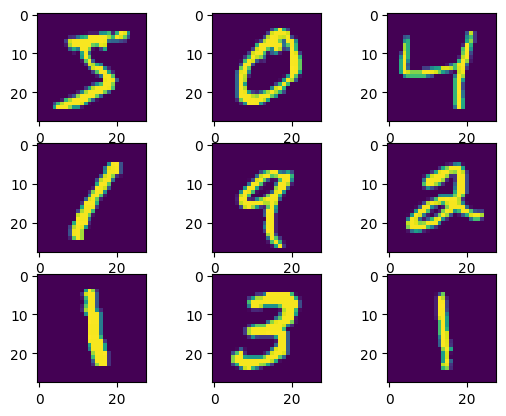

In [5]:
import matplotlib.pyplot as plt
for i in range(9):
    #print(i)
    plt.subplot(330 + 1 + i)
    plt.imshow(xtrn[i])
plt.show()

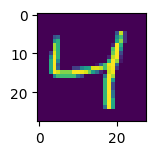

In [6]:
pyplot.subplot(330 + 1)
pyplot.imshow(xtrn[2])
pyplot.show()

In [7]:
xtrn[1].shape

(28, 28)

In [8]:
xtrn[1]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  51, 159, 253, 159,  50,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  48, 238, 252, 252, 252, 237,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [9]:
idx_trn = np.argsort(np.random.random(ytrn.shape[0]))

In [10]:
xtrn = xtrn[idx_trn]
ytrn = ytrn[idx_trn]

In [11]:
idx_tst = np.argsort(np.random.random(ytst.shape[0]))

In [12]:
ytst = ytst[idx_tst]
xtst = xtst[idx_tst]

In [13]:
np.save('mnist_train_images.npy', xtrn)
np.save('mnist_train_labels.npy', ytrn)

In [14]:
np.save('mnist_tst_images.npy', xtst)
np.save('mnist_tst_labels.npy', ytst)

In [15]:
xtrnv = xtrn.reshape((60000, 28*28))
xtstv = xtst.reshape((10000, 28*28))
np.save('mnist_train_vectors.npy', xtrnv)
np.save('mnist_test_vectors.npy',  xtst)

In [16]:
idx = np.argsort(np.random.random(28 * 28))
idx

array([ 27, 658, 285, 561, 146, 598, 427, 437, 117, 494, 302, 718, 211,
       345, 326, 498, 348, 393, 728,  35, 179, 192, 481, 667, 355, 120,
        29, 671, 143,  84, 375, 336, 392, 312, 177, 123, 556, 218, 513,
       584, 351, 568, 491,  45, 368,  30, 599, 489,  55, 463, 652, 607,
       329, 604, 347, 460, 442, 650, 487, 774, 178, 160, 625, 573, 410,
       256,  78, 696, 609, 449, 423, 370, 516, 456, 239, 539, 431, 605,
       181, 705, 548,  73, 202, 480, 149, 389, 765, 575, 270, 104, 361,
       161, 703, 748, 451, 474, 780,  80, 571, 528, 305, 301, 525, 328,
       366, 340, 402, 518, 541, 695, 764, 141, 771,  69, 190, 505, 376,
       742, 646,  68,   1,  71, 726,  79, 737, 578, 264, 316, 306,  93,
       262, 106, 194, 395, 359, 268, 693, 492, 553, 719, 129, 761, 374,
       110, 159, 467, 711, 354, 102,  56, 232, 758, 426, 589,  51, 753,
       663, 517, 535, 212, 265, 740, 417, 407, 277, 466, 490,  83, 635,
       628, 184, 648, 770, 662, 522, 313, 242,  89, 254, 377, 76

In [17]:
idx.shape

(784,)

In [18]:
type(idx)

numpy.ndarray

In [19]:
for i in range(6000):
    xtrnv[i,:] = xtrnv[i,idx]

In [20]:
xtrnv[0]

array([  0,   5,   0,   0,   0, 244,   0,   0,   0, 253,   0,   0,  59,
       137,   0,   0, 128,   0,   0,   0,   0,   0,   0,   0,  56,   0,
         0,   0,   0,   0, 244,   0,   0,   0,   0,   0,   0,   0, 253,
         0,   0,  12,   3,   0,   0,   0, 253,   0,   0,   0,   0,   0,
        41, 132, 253,   0,   0,   0,   0,   0,   0,  15,   0, 248,  86,
         0,   0,   0,   0,   0,   0,   0,   0, 133,  87,   0, 103,  17,
       253,   0, 253,   0,   0,   0,   0,   0,   0, 254,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0, 131,   0,   0,  22,   0, 253,
         0,   0, 254,   0, 253,   0,   0,   0,   0,   0,   0,   0,  13,
         0,   0,   0,   0,   0,   0,   0,   0,  63, 253,   0,   0,   0,
       109,   0,   0,   0,   0,   0,   0,  52,   0,   0,   0,   0, 253,
         0, 212, 253,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0, 188,   0,   0,   0,   0, 247,   0,   0,   0,
       253,   0,   0,   0,   0, 249,   0,   0,   0,   0,   0,   

In [21]:
for i in range(10000):
    xtstv[i,:] = xtstv[i,idx]

In [22]:
xtst[8]

array([[  0, 255,   0,   0,   0, 255,   0, 255,   0, 191,   0,   0, 255,
          0,   0,   0, 255,   0,   0,   0, 255,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0, 255,   0,   0,   0, 191,   0,   0,   0,   0,   0, 255,
        255,   0,   0,   0,   0, 255,   0,   0,   0,   0, 255,   0, 255,
        255, 128],
       [  0,   0,   0,   0, 255, 128, 255,  64, 255,   0,   0,   0,   0,
          0,   0,   0,   0,   0, 255, 255, 255, 255, 255,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0, 255,   0,   0,   0,   0,   0,   0,   0,   0,
          0, 255,   0,   0,   0, 255,   0,   0,   0, 255,   0, 128,   0,
          0,   0],
       [  0,   0,   0,   0, 255,   0,   0,   0,   0,   0,   0,   0,   0,
        255, 255,   0,   0,   0, 255,   0,   0,   0,   0, 255,   0,   0,
        255,   0],
       [  0,   0, 255,   0, 255, 255,   0, 128,   0,   0,   0,   0,   0,
          0,   0,   0,  64,   0,   0, 255,  64,   0,   0, 255,   0, 255,
          0,   0],
       [25

In [23]:
np.save('mnist_train_scrambled_vectors.npy', xtrnv)
np.save('mnist_test_scrambled_vectors.npy', xtstv)

In [24]:
t = np.zeros((60000, 28, 28))
for i in range(60000):
    t[i,:,:] = xtrnv[i,:].reshape((28, 28))

In [25]:
np.save('mnist_train_scrambled_images.npy', t)

In [26]:
t = np.zeros((10000, 28, 28))
for i in range(10000):
    t[i,:] = xtstv[i,:].reshape((28, 28))

In [27]:
np.save('mnist_test_scrambled_images.npy', t)